# Playground

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data: Features and Label for 3 planes
W_Feature = pd.read_csv("input_files/W_Feature.csv")
W_Label = pd.read_csv("input_files/W_Label.csv")

W_Feature.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 249990,Pixel 249991,Pixel 249992,Pixel 249993,Pixel 249994,Pixel 249995,Pixel 249996,Pixel 249997,Pixel 249998,Pixel 249999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0


In [31]:
imageWidth = 500
imageHeight = 500
imageDepth = 1;

X = W_Feature.iloc[:,:]
X = X.values.reshape(X.shape[0], imageWidth, imageHeight, imageDepth)
y = W_Label.iloc[:,:]
y = y.values.reshape(y.shape[0], imageWidth, imageHeight, imageDepth)

# Normalize X to 1


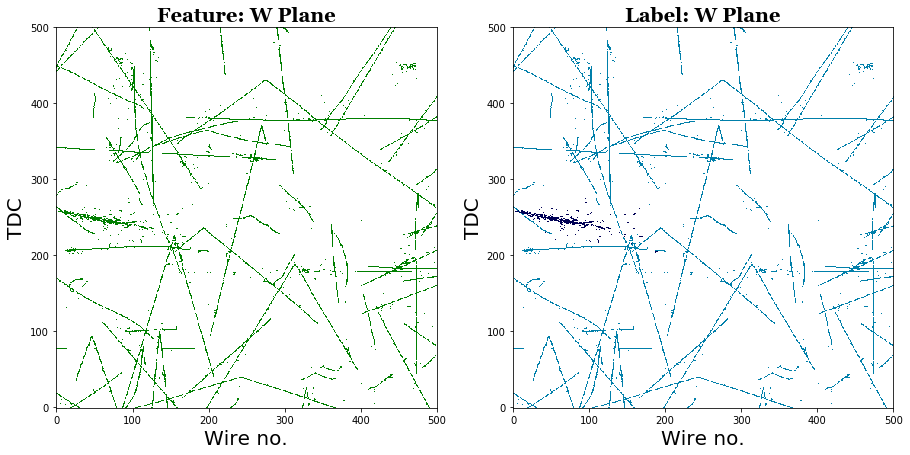

In [79]:
# Visualize a Image
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xImages = X.reshape(X.shape[0], imageWidth, imageHeight)
yImages = y.reshape(y.shape[0], imageWidth, imageHeight)

def visualize_input(img, ax):
    ax.imshow(img, interpolation='none',cmap='ocean_r', origin='lower',vmin=0., vmax=3.0)
    ax.set_xlabel("Wire no.", fontsize=20)
    ax.set_ylabel("TDC", fontsize=20)
    
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(15,10), facecolor='w')
visualize_input(xImages[0], ax0)
visualize_input(yImages[0], ax1)

ax0.set_title('Feature: W Plane',fontsize=20,fontname='Georgia',fontweight='bold')
ax1.set_title('Label: W Plane',fontsize=20,fontname='Georgia',fontweight='bold')
plt.show()

In [64]:
unique_values, unique_counts = np.unique(y, return_counts=True)
print('Label values:',unique_values)
print('Label counts:',unique_counts)

Label values: [0 1 2]
Label counts: [7136802  354166    9032]


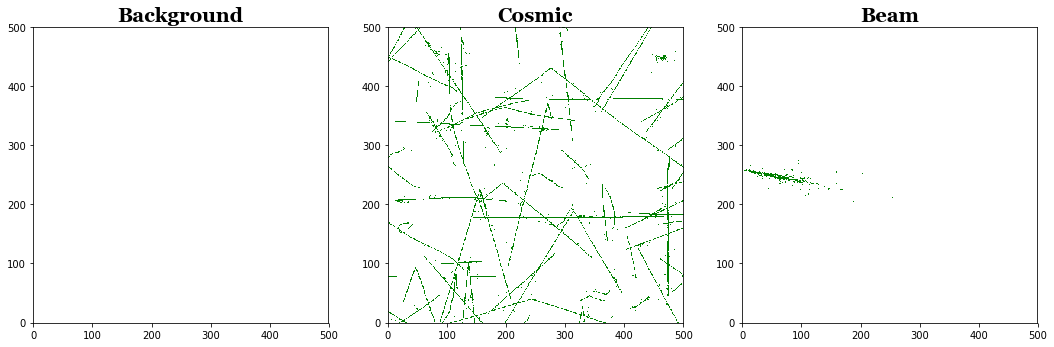

In [75]:
categories = ['Background','Cosmic','Beam']

fig, axes = plt.subplots(1, len(unique_values), figsize=(18,12), facecolor='w')
for index, value in enumerate(unique_values):
    ax = axes[index]
    mask = (yImages[0] == value)
    ax.imshow(xImages[0]*mask, interpolation='none', cmap='ocean_r', origin='lower',vmin=0., vmax=3.0)
    ax.set_title(categories[index],fontsize=20,fontname='Georgia',fontweight='bold')
plt.show()